In [21]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

data = pd.read_csv("/content/Hotel Reservations.csv")

label_segment = LabelEncoder()
label_status = LabelEncoder()
label_meal_plan = LabelEncoder()
label_reserved = LabelEncoder()

data['booking_status'] = label_status.fit_transform(data['booking_status'])
data['type_of_meal_plan'] = label_meal_plan.fit_transform(data['type_of_meal_plan'])
data['market_segment_type'] = label_segment.fit_transform(data['market_segment_type'])
data['room_type_reserved'] = label_reserved.fit_transform(data['room_type_reserved'])

name_mapping = dict(zip(label_status.classes_, label_status.transform(label_status.classes_)))

#remove the booking ID (not needed)
data = data.drop('Booking_ID', axis = 1)

#remove the booking status (the variable we are trying to predict)
X = data.drop('booking_status', axis = 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#The Goal (prediction)
y = data['booking_status']

#feature selection
clf = DecisionTreeClassifier(random_state = 40)
clf.fit(X, y)

trans = SelectFromModel(clf, threshold='median')
X = trans.fit_transform(X, y)

#oversampling
oversampler = RandomOverSampler(random_state=40)
X, y = oversampler.fit_resample(X, y)

#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

tf.random.set_seed(40)

In [22]:
#build a 3 layers model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4963 - accuracy: 0.7616
Epoch 2/10
1220/1220 [==============================] - 2s 2ms/step - loss: 0.4549 - accuracy: 0.7863
Epoch 3/10
1220/1220 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.7915
Epoch 4/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4326 - accuracy: 0.7962
Epoch 5/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4237 - accuracy: 0.8006
Epoch 6/10
1220/1220 [==============================] - 2s 2ms/step - loss: 0.4182 - accuracy: 0.8032
Epoch 7/10
1220/1220 [==============================] - 2s 2ms/step - loss: 0.4124 - accuracy: 0.8056
Epoch 8/10
1220/1220 [==============================] - 2s 2ms/step - loss: 0.4083 - accuracy: 0.8085
Epoch 9/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4035 - accuracy: 0.8116
Epoch 10/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.399

In [23]:
#build a 6 layers model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 5s 3ms/step - loss: 0.4811 - accuracy: 0.7654
Epoch 2/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4316 - accuracy: 0.7957
Epoch 3/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4044 - accuracy: 0.8116
Epoch 4/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3873 - accuracy: 0.8202
Epoch 5/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3730 - accuracy: 0.8269
Epoch 6/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.3626 - accuracy: 0.8328
Epoch 7/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3525 - accuracy: 0.8360
Epoch 8/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3475 - accuracy: 0.8381
Epoch 9/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.3394 - accuracy: 0.8411
Epoch 10/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.334

In [24]:
#build a 11 layersmodel, 5 of them are dropout layer
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 6s 4ms/step - loss: 0.5221 - accuracy: 0.7412
Epoch 2/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4730 - accuracy: 0.7773
Epoch 3/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4582 - accuracy: 0.7847
Epoch 4/10
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4458 - accuracy: 0.7911
Epoch 5/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4373 - accuracy: 0.7985
Epoch 6/10
1220/1220 [==============================] - 4s 4ms/step - loss: 0.4280 - accuracy: 0.8011
Epoch 7/10
1220/1220 [==============================] - 4s 4ms/step - loss: 0.4224 - accuracy: 0.8060
Epoch 8/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4168 - accuracy: 0.8058
Epoch 9/10
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4140 - accuracy: 0.8096
Epoch 10/10
1220/1220 [==============================] - 4s 4ms/step - loss: 0.409

The model with 6 Dense Layers (second model) preformed the best out of the three, with an 83.91% accuracy.

Next i will change the number of nurons in the layers to try and improve the resaults.

In [25]:
#build a 6 layers model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 4s 2ms/step - loss: 0.4850 - accuracy: 0.7637
Epoch 2/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.7914
Epoch 3/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4158 - accuracy: 0.8066
Epoch 4/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.4015 - accuracy: 0.8126
Epoch 5/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3867 - accuracy: 0.8205
Epoch 6/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8239
Epoch 7/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.3665 - accuracy: 0.8303
Epoch 8/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.3596 - accuracy: 0.8334
Epoch 9/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3549 - accuracy: 0.8360
Epoch 10/10
1220/1220 [==============================] - 3s 2ms/step - loss: 0.349

In [26]:
#build a 6 layers model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 5s 3ms/step - loss: 0.4813 - accuracy: 0.7650
Epoch 2/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4355 - accuracy: 0.7940
Epoch 3/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.4112 - accuracy: 0.8080
Epoch 4/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3965 - accuracy: 0.8166
Epoch 5/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8237
Epoch 6/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3714 - accuracy: 0.8264
Epoch 7/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3601 - accuracy: 0.8327
Epoch 8/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.3529 - accuracy: 0.8360
Epoch 9/10
1220/1220 [==============================] - 4s 3ms/step - loss: 0.3459 - accuracy: 0.8373
Epoch 10/10
1220/1220 [==============================] - 3s 3ms/step - loss: 0.340

In [27]:
#build a 6 layers model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 8s 6ms/step - loss: 0.4791 - accuracy: 0.7679
Epoch 2/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.4317 - accuracy: 0.7960
Epoch 3/10
1220/1220 [==============================] - 7s 5ms/step - loss: 0.4064 - accuracy: 0.8120
Epoch 4/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3865 - accuracy: 0.8213
Epoch 5/10
1220/1220 [==============================] - 7s 5ms/step - loss: 0.3740 - accuracy: 0.8288
Epoch 6/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3628 - accuracy: 0.8300
Epoch 7/10
1220/1220 [==============================] - 7s 5ms/step - loss: 0.3548 - accuracy: 0.8354
Epoch 8/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3465 - accuracy: 0.8376
Epoch 9/10
1220/1220 [==============================] - 7s 5ms/step - loss: 0.3411 - accuracy: 0.8401
Epoch 10/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.334

In [20]:
#build a 6 layers model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
1220/1220 [==============================] - 10s 7ms/step - loss: 0.4796 - accuracy: 0.7686
Epoch 2/10
1220/1220 [==============================] - 9s 8ms/step - loss: 0.4286 - accuracy: 0.7982
Epoch 3/10
1220/1220 [==============================] - 8s 6ms/step - loss: 0.4054 - accuracy: 0.8117
Epoch 4/10
1220/1220 [==============================] - 9s 7ms/step - loss: 0.3876 - accuracy: 0.8185
Epoch 5/10
1220/1220 [==============================] - 9s 7ms/step - loss: 0.3779 - accuracy: 0.8239
Epoch 6/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.3664 - accuracy: 0.8280
Epoch 7/10
1220/1220 [==============================] - 9s 7ms/step - loss: 0.3586 - accuracy: 0.8337
Epoch 8/10
1220/1220 [==============================] - 8s 7ms/step - loss: 0.3489 - accuracy: 0.8373
Epoch 9/10
1220/1220 [==============================] - 9s 7ms/step - loss: 0.3421 - accuracy: 0.8400
Epoch 10/10
1220/1220 [==============================] - 9s 7ms/step - loss: 0.33

The best resault was from the model that all it's layers contain 256 neurons

let's get it's confusion matrix and learning curve

305/305 [==============================] - 1s 2ms/step


<Axes: >

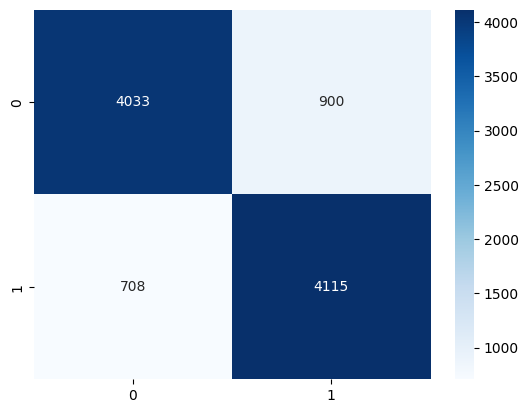

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes of the test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

the confusion matrix is showing:
- True Negative is 4033
- True Positive is 4115
- False Positives is 900
- False Negatives is 708

Epoch 1/10
1220/1220 [==============================] - 7s 6ms/step - loss: 0.3297 - accuracy: 0.8433 - val_loss: 0.3578 - val_accuracy: 0.8337
Epoch 2/10
1220/1220 [==============================] - 7s 6ms/step - loss: 0.3233 - accuracy: 0.8483 - val_loss: 0.3364 - val_accuracy: 0.8435
Epoch 3/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3183 - accuracy: 0.8492 - val_loss: 0.3351 - val_accuracy: 0.8398
Epoch 4/10
1220/1220 [==============================] - 7s 6ms/step - loss: 0.3143 - accuracy: 0.8528 - val_loss: 0.3252 - val_accuracy: 0.8443
Epoch 5/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3096 - accuracy: 0.8560 - val_loss: 0.3485 - val_accuracy: 0.8360
Epoch 6/10
1220/1220 [==============================] - 7s 6ms/step - loss: 0.3044 - accuracy: 0.8556 - val_loss: 0.3144 - val_accuracy: 0.8573
Epoch 7/10
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3006 - accuracy: 0.8600 - val_loss: 0.3250 - val_accuracy:

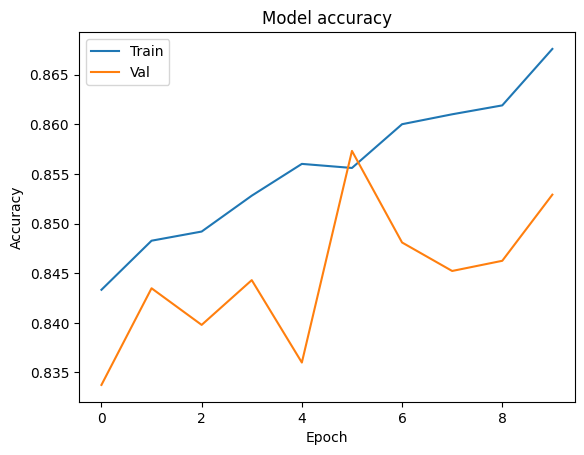

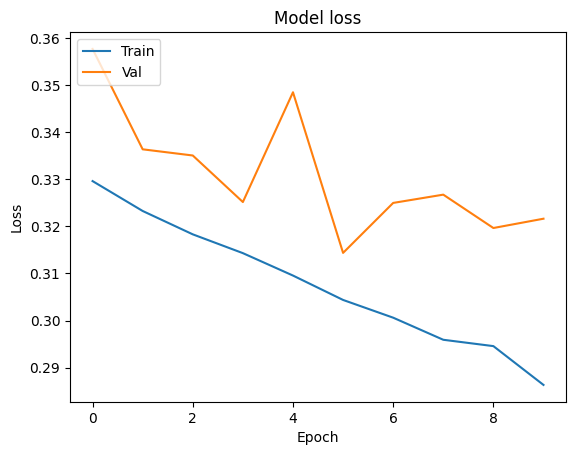

In [29]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

the learning curve shows that the model is learning the new data and generalizing well.

Comparison and conclusion:

the best deep learning model had an accuracy of 84.09%, and a loss of 34.45%
while the best classical model had an accuracy of 91.78%

However, the learning curve for the classical model, indicated that there might be overfitting since the training accuracy was always close to 1.
the deep learning model on the otherhand, genarlized well to new data. the accuracy started out a bit low, and increased as the number of epochs increased.

the Confusion matrix for the deep learning model shows that the model is making error classifing reservations that were not canceled. (predicting not canceled even though they were).


---


a higher False positive error is better than a higher false negative as the costumers who did not cancel will have higher probapility of having their room ready for them, and a few of the rooms that were predicted to not cancel canceled.